In [7]:
import random, pylab
%matplotlib inline

### 正态分布与指数分布

正态分布

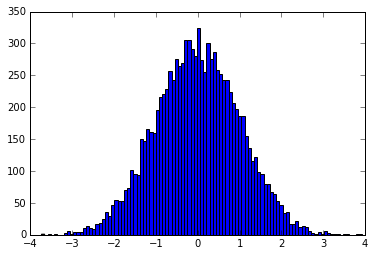

In [8]:
#set line width
pylab.rcParams['lines.linewidth'] = 6
#set font size for titles 
pylab.rcParams['axes.titlesize'] = 20
#set font size for labels on axes
pylab.rcParams['axes.labelsize'] = 20
#set size of numbers on x-axis
pylab.rcParams['xtick.major.size'] = 5
#set size of numbers on y-axis
pylab.rcParams['ytick.major.size'] = 5

def makeNormal(mean, sd, numSamples):
    samples = []
    for i in range(numSamples):
        samples.append(random.gauss(mean, sd))
    pylab.hist(samples, bins=101)

makeNormal(0, 1.0, 10000)
pylab.show()

指数衰减

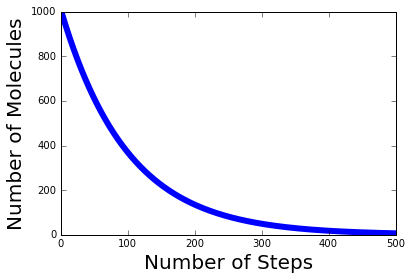

In [14]:
def clear(n, clearProb, steps):
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-clearProb)**t))
    pylab.plot(numRemaining, label = 'Exponential Decay')

clear(1000, 0.01, 500)
pylab.xlabel('Number of Steps')
pylab.ylabel('Number of Molecules')
pylab.show()

另一版本的指数衰减

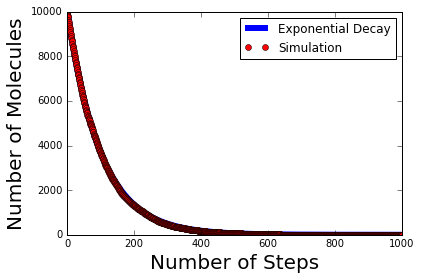

In [19]:
def clearSim(n, clearProb, steps):
    numRemaining = [n]
    for t in range(steps):
        numLeft = numRemaining[-1]
        for m in range(numRemaining[-1]):
            if random.random() <= clearProb: 
                numLeft -= 1
        numRemaining.append(numLeft)
    pylab.plot(numRemaining, 'ro', label = 'Simulation')

clear(10000, 0.01, 1000)
clearSim(10000, 0.01, 1000)
pylab.xlabel('Number of Steps')
pylab.ylabel('Number of Molecules')
pylab.legend()
pylab.show()

### Monty Hall Problem

三扇门后，有一辆车和两只羊。Monty知道哪扇门背后有车。你先选一扇门，Monty随后会打开一扇背后有羊的门，此时你可以坚持原来的选择，也可以选择剩下的那扇门。

在模拟中，对Monty的选择不做限制，即允许出现Monty根据随机原则选中了背后有车的门，但需要在最终对比胜率时将这种情况去掉。

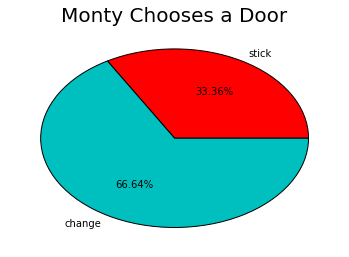

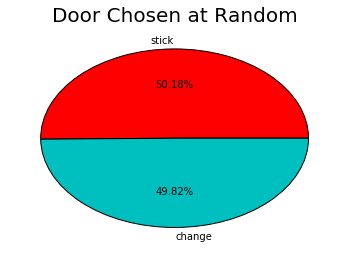

In [21]:
def montyChoose(guessDoor, prizeDoor):
    if 1 != guessDoor and 1 != prizeDoor:
        return 1
    if 2 != guessDoor and 2 != prizeDoor:
        return 2
    return 3

def randomChoose(guessDoor, prizeDoor):
    if guessDoor == 1:
        return random.choice([2,3])
    if guessDoor == 2:
        return random.choice([1,3])
    return random.choice([1,2])

def simMontyHall(numTrials, chooseFcn):
    stickWins, switchWins, noWin = (0, 0, 0)
    prizeDoorChoices = [1,2,3]
    guessChoices = [1,2,3]
    for t in range(numTrials):
        prizeDoor = random.choice([1,2,3])
        guess = random.choice([1,2,3])
        toOpen = chooseFcn(guess, prizeDoor)
        if toOpen == prizeDoor:
            noWin += 1
        elif guess == prizeDoor:
            stickWins += 1
        else:
            switchWins += 1
    return (stickWins, switchWins)#抛弃Monty选中背后有车的门的那些trial

def displayMHSim(simResults, title):
    stickWins, switchWins = simResults
    pylab.pie([stickWins, switchWins], colors = ['r', 'c'], labels = ['stick', 'change'],\
             autopct = '%.2f%%')
    pylab.title(title)
    
simResults = simMontyHall(100000, montyChoose)
displayMHSim(simResults, 'Monty Chooses a Door')
pylab.figure()
simResults = simMontyHall(100000, randomChoose)
displayMHSim(simResults, 'Door Chosen at Random')
pylab.show()

### L6 Problem3